In [2]:
from datascience import *
import numpy as np
import matplotlib
matplotlib.use('Agg', warn=False)
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [3]:
#Get all data from pokeon csv
raw = Table.read_table('pokemon.csv')

In [5]:
#Drop some of the columns that are less relevant, i.e., weakness against water types, etc.
national_pokedex = raw.drop(range(1,19)).drop(["base_egg_steps","base_happiness","experience_growth","japanese_name"])

In [6]:
#Create the Sinnoh Regional Pokedex
sinnoh_pokedex = national_pokedex.where("generation",are.equal_to(4)).drop("generation")

#Sinnoh non-legendary Pokemon with highest BST
sinnoh_pokedex.sort("base_total",descending =True).where("is_legendary",are.not_equal_to(1)).drop("is_legendary").take(np.arange(0,10))

abilities,attack,base_total,capture_rate,classfication,defense,height_m,hp,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg
"['Sand Veil', 'Rough Skin']",170,700,45,Mach Pokémon,115,1.9,108,Garchomp,50,445,120,95,92,dragon,ground,95
"['Steadfast', 'Inner Focus', 'Justified']",145,625,45,Aura Pokémon,88,1.2,70,Lucario,88.1,448,140,70,112,fighting,steel,54
"['Steadfast', 'Justified']",165,618,45,Blade Pokémon,95,1.6,68,Gallade,100,475,65,115,110,psychic,fighting,52
"['Snow Warning', 'Soundproof']",132,594,60,Frosted Tree Pokémon,105,2.2,90,Abomasnow,50,460,132,105,30,grass,ice,135.5
"['Cute Charm', 'Klutz', 'Limber']",136,580,60,Rabbit Pokémon,94,1.2,65,Lopunny,50,428,54,96,135,normal,nan,33.3
"['Hustle', 'Serene Grace', 'Super Luck']",50,545,30,Jubilee Pokémon,95,1.5,85,Togekiss,88.1,468,120,115,80,fairy,flying,38
"['Flame Body', 'Vital Spirit']",95,540,30,Blast Pokémon,67,1.6,75,Magmortar,75.4,467,125,95,83,fire,nan,68
"['Motor Drive', 'Vital Spirit']",123,540,30,Thunderbolt Pokémon,67,1.8,75,Electivire,75.4,466,95,85,95,electric,nan,138.6
"['Adaptability', 'Download', 'Analytic']",80,535,30,Virtual Pokémon,70,0.9,85,Porygon-Z,nan,474,135,75,90,normal,nan,34
"['Chlorophyll', 'Leaf Guard', 'Regenerator']",100,535,30,Vine Pokémon,125,2,100,Tangrowth,50,465,110,50,50,grass,nan,128.6


In [11]:
#Create column to measure total overall attacking stats (PHYSICAL + SPECIAL)
national_with_ovr_attack = national_pokedex.with_column("attack_total", 
    national_pokedex.column("attack") + national_pokedex.column("sp_attack"))

#Find names of pokemon with the ten highest overall attacks
national_with_ovr_attack.sort("attack_total",True).take(np.arange(0,10)).column("name")

array(['Rayquaza', 'Mewtwo', 'Hoopa', 'Groudon', 'Kyogre', 'Diancie',
       'Aegislash', 'Greninja', 'Kyurem', 'Garchomp'], 
      dtype='<U12')

In [12]:
legendary_pokemon = national_pokedex.where("is_legendary", are.equal_to(1)).drop("is_legendary")

#Legendary pokemon with a gender
legendary_pokemon.where("percentage_male", are.above_or_equal_to(0)).show() 

abilities,attack,base_total,capture_rate,classfication,defense,height_m,hp,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation
['Levitate'],100,700,3,Eon Pokémon,120,1.4,80,Latias,0,380,140,150,110,dragon,psychic,40,3
['Levitate'],130,700,3,Eon Pokémon,100,2,80,Latios,100,381,160,120,110,dragon,psychic,60,3
"['Flash Fire', 'Flame Body']",90,600,3,Lava Dome Pokémon,106,1.7,91,Heatran,50,485,130,106,77,fire,steel,430,4
['Levitate'],70,600,3,Lunar Pokémon,120,1.5,120,Cresselia,0,488,75,130,85,psychic,nan,85.6,4
"['Prankster', 'Defiant', 'Regenerator']",100,580,3,Cyclone Pokémon,80,1.5,79,Tornadus,100,641,110,90,121,flying,nan,63,5
"['Prankster', 'Defiant', 'Volt Absorb']",105,580,3,Bolt Strike Pokémon,70,1.5,79,Thundurus,100,642,145,80,101,electric,flying,61,5
"['Sand Force', 'Sheer Force', 'Intimidate']",145,600,3,Abundance Pokémon,90,1.5,89,Landorus,100,645,105,80,91,ground,flying,68,5


In [17]:
#Which pokemon are overweight? First calculate each pokemon's BMI
overweight_pokemon = national_pokedex.with_column("BMI", 
    np.round(national_pokedex.column("weight_kg")/national_pokedex.column("height_m"),2)).where("BMI", are.above_or_equal_to(25))

overweight_pokemon.sort("BMI",descending = True)

abilities,attack,base_total,capture_rate,classfication,defense,height_m,hp,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary,BMI
['Sturdy'],29,400,45,Protostar Pokémon,131,0.1,43,Cosmoem,nan,790,29,131,37,psychic,nan,999.9,7,1,9999
"['Own Tempo', 'Stamina', 'Inner Focus']",125,500,60,Draft Horse Pokémon,100,2.5,100,Mudsdale,50,750,55,85,35,ground,nan,920,7,0,368
"['Clear Body', 'Light Metal']",145,700,3,Iron Leg Pokémon,150,1.6,80,Metagross,nan,376,105,110,110,steel,psychic,550,3,0,343.75
['Drought'],180,770,3,Continent Pokémon,160,3.5,100,Groudon,nan,383,150,90,90,ground,nan,950,3,1,271.43
"['Flash Fire', 'Flame Body']",90,600,3,Lava Dome Pokémon,106,1.7,91,Heatran,50,485,130,106,77,fire,steel,430,4,1,252.94
"['Own Tempo', 'Ice Body', 'Sturdy']",117,514,55,Iceberg Pokémon,184,2,95,Avalugg,50,713,44,46,28,ice,nan,505,6,0,252.5
"['Sturdy', 'Magnet Pull', 'Sand Force']",55,525,60,Compass Pokémon,145,1.4,60,Probopass,50,476,75,150,40,rock,steel,340,4,0,242.86
"['Immunity', 'Thick Fat', 'Gluttony']",110,540,25,Sleeping Pokémon,65,2.1,160,Snorlax,88.1,143,65,110,30,normal,nan,460,1,0,219.05
"['Water Compaction', 'Sand Veil']",75,480,60,Sand Castle Pokémon,110,1.3,85,Palossand,50,770,100,75,35,ghost,ground,250,7,0,192.31
"['Pickup', 'Thick Fat', 'Gluttony']",85,390,50,Big Eater Pokémon,40,0.6,135,Munchlax,88.1,446,40,85,5,normal,nan,105,4,0,175


In [18]:
#What percentage of pokemon are overweight?
round(overweight_pokemon.num_rows/national_pokedex.num_rows*100,2)

54.06

In [23]:
#What is the tallest pokemon?
national_pokedex.where("height_m", lambda x: x == max(national_pokedex.column("height_m"))).column("name")[0]

#Note: could replace lambda function with clause are.equal_to(max(national_pokedex.column("height_m")))

'Wailord'

In [24]:
national_pokedex.sort("height_m",descending=True).where("height_m",are.above_or_equal_to(0)) #exclude "nan" heights

abilities,attack,base_total,capture_rate,classfication,defense,height_m,hp,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
"['Water Veil', 'Oblivious', 'Pressure']",90,500,60,Float Whale Pokémon,45,14.5,170,Wailord,50,321,90,45,60,water,nan,398,3,0
['Beast Boost'],101,570,25,Launch Pokémon,103,9.2,97,Celesteela,nan,797,107,101,61,steel,flying,999.9,7,1
"['Rock Head', 'Sturdy', 'Sheer Force']",125,610,25,Iron Snake Pokémon,230,9.2,75,Steelix,50,208,55,95,30,steel,ground,400,2,0
"['Rock Head', 'Sturdy', 'Weak Armor']",45,385,45,Rock Snake Pokémon,160,8.8,35,Onix,50,95,30,45,70,rock,ground,210,1,0
['Air Lock'],180,780,45,Sky High Pokémon,100,7,105,Rayquaza,nan,384,180,100,115,dragon,flying,206.5,3,1
"['Intimidate', 'Moxie']",155,640,45,Atrocious Pokémon,109,6.5,95,Gyarados,50,130,70,130,81,water,flying,235,1,0
"['Marvel Scale', 'Competitive', 'Cute Charm']",60,540,60,Tender Pokémon,79,6.2,95,Milotic,50,350,100,125,81,water,nan,162,3,0
['Dark Aura'],131,680,45,Destruction Pokémon,95,5.8,126,Yveltal,nan,717,131,98,99,dark,flying,203,6,1
['Beast Boost'],101,570,15,Junkivore Pokémon,53,5.5,223,Guzzlord,nan,799,97,53,43,dark,dragon,888,7,1
"['Pressure', 'Telepathy']",120,680,3,Temporal Pokémon,120,5.4,100,Dialga,nan,483,150,100,90,steel,dragon,683,4,1


In [27]:
#Has there been a power creep over generations? Find base total stats for each generation
bst_overall = []
for gen in np.arange(1,8):
    bst_overall.append(np.mean(national_pokedex.where("generation", gen).column("base_total")))

In [28]:
bstByGen = Table().with_column("Generation", np.arange(1,8),"BST", bst_overall)

In [30]:
bstByGen.sort("BST", descending = True) #Sinnoh as highest overall BST average! 

Generation,BST
4,451.178
7,448.163
6,437.611
5,427.038
3,420.022
1,416.252
2,413.18


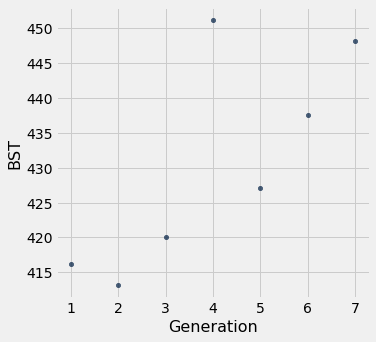

In [31]:
bstByGen.scatter("Generation","BST")

In [33]:
#Find all pseudo-legendaries (pokemon with base total stat of at least 600 but not a legendary)
pseudo_legendaries = national_pokedex.where("is_legendary",are.not_equal_to(1)).where("base_total",are.above_or_equal_to(600))
pseudo_legendaries.sort("base_total", descending = True)

abilities,attack,base_total,capture_rate,classfication,defense,height_m,hp,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
"['Sand Veil', 'Rough Skin']",170,700,45,Mach Pokémon,115,1.9,108,Garchomp,50,445,120,95,92,dragon,ground,95,4,0
"['Clear Body', 'Light Metal']",145,700,3,Iron Leg Pokémon,150,1.6,80,Metagross,nan,376,105,110,110,steel,psychic,550,3,0
"['Intimidate', 'Moxie']",145,700,45,Dragon Pokémon,130,1.5,95,Salamence,50,373,120,90,120,dragon,flying,102.6,3,0
"['Sand Stream', 'Unnerve']",164,700,45,Armor Pokémon,150,2,100,Tyranitar,50,248,95,120,71,rock,dark,202,2,0
['Truant'],160,670,45,Lazy Pokémon,100,2,150,Slaking,50,289,95,65,100,normal,nan,130.5,3,0
"['Torrent', 'Protean', 'Battle Bond']",145,640,45,Ninja Pokémon,67,1.5,72,Greninja,88.1,658,153,71,132,water,dark,40,6,0
"['Intimidate', 'Moxie']",155,640,45,Atrocious Pokémon,109,6.5,95,Gyarados,50,130,70,130,81,water,flying,235,1,0
"['Torrent', 'Damp']",150,635,45,Mud Fish Pokémon,110,1.5,100,Swampert,88.1,260,95,110,70,water,ground,81.9,3,0
"['Blaze', 'Solar Power']",104,634,45,Flame Pokémon,78,1.7,78,Charizard,88.1,6,159,115,100,fire,flying,90.5,1,0
"['Sturdy', 'Rock Head', 'Heavy Metal']",140,630,45,Iron Armor Pokémon,230,2.1,70,Aggron,50,306,60,80,50,steel,rock,360,3,0


In [36]:
#Sinnoh Pseudo-legendaries
pseudo_legendaries.where("generation", 4)

abilities,attack,base_total,capture_rate,classfication,defense,height_m,hp,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
"['Sand Veil', 'Rough Skin']",170,700,45,Mach Pokémon,115,1.9,108,Garchomp,50,445,120,95,92,dragon,ground,95,4,0
"['Steadfast', 'Inner Focus', 'Justified']",145,625,45,Aura Pokémon,88,1.2,70,Lucario,88.1,448,140,70,112,fighting,steel,54,4,0
"['Steadfast', 'Justified']",165,618,45,Blade Pokémon,95,1.6,68,Gallade,100,475,65,115,110,psychic,fighting,52,4,0


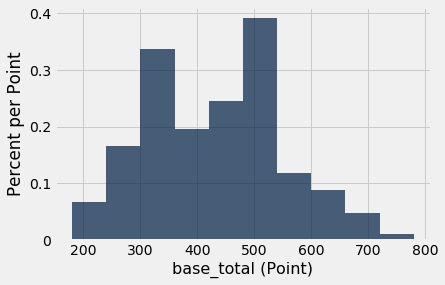

In [39]:
#Simple histogram of base total stats. Note that to find percentage of pokemon in a certain bin, take the area of a column
national_pokedex.hist("base_total", unit = "Point")

In [52]:
#Organize pokemon by region and find how many pokemon in each
regional_bins = [1,152,252,387,494,650,722,802] #Note last pokemon in the pokedex has number 801

bin_counts = national_pokedex.bin("pokedex_number",bins = regional_bins)

bin_counts = bin_counts.with_column("Region", ["Kanto", "Johto", "Hoenn", "Sinnoh", "Unova", "Kalos", "Alola", "TBD"])
bin_counts = bin_counts.relabeled("pokedex_number count", "Number of Pokemon")

bin_counts

bin,Number of Pokemon,Region
1,151,Kanto
152,100,Johto
252,135,Hoenn
387,107,Sinnoh
494,156,Unova
650,72,Kalos
722,80,Alola
802,0,TBD


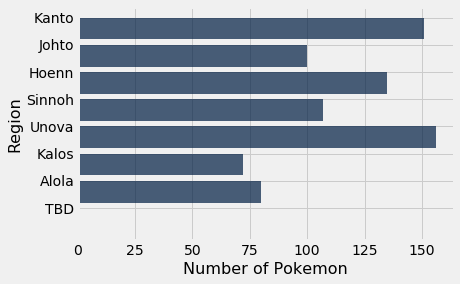

In [54]:
bin_counts.barh("Region","Number of Pokemon")

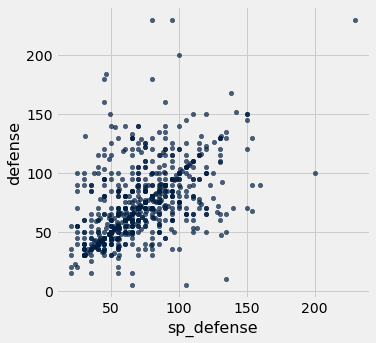

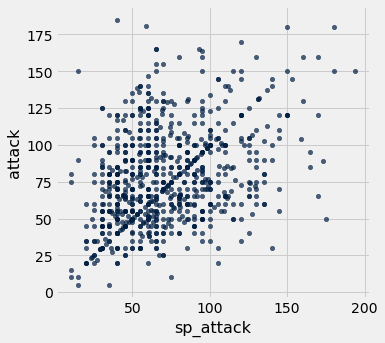

In [57]:
#What's the relationship between special defense and physical defense?
national_pokedex.scatter("sp_defense","defense") 

#What's the relationship between special attack and physical attack?
national_pokedex.scatter("sp_attack","attack") 

In [64]:
#Create uneven bins to focus on pokemon with higher bst total stats

bst_uneven = [0,450,500,550,600,700,800] 
bst_binned = national_pokedex.bin('base_total',bins = bst_uneven)

#Calculate height of each bin: % of total/width of bin
bst_binned = bst_binned.with_column("Width", np.append(np.diff(bst_binned.column("bin")), 1))
bst_binned.with_column("Height", 100*bst_binned.column("base_total count")/national_pokedex.num_rows/bst_binned.column("Width"))

bin,base_total count,Width,Height
0,412,450,0.114302
450,161,50,0.401998
500,111,50,0.277154
550,47,50,0.117353
600,56,100,0.0699126
700,14,100,0.0174782
800,0,1,0


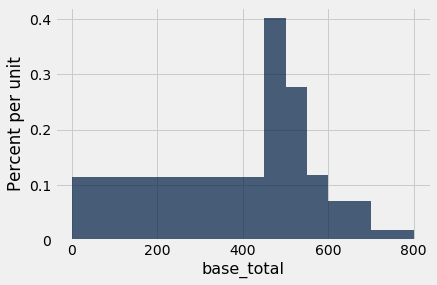

In [65]:
national_pokedex.hist('base_total', bins = bst_uneven)